# NYC Airbnb Listings Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('airbnb_cleaned.csv')

First, a quick overview of our dataset.

In [3]:
df.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,reviewed_yn,subway_access,mall,stadium,airport,name_len,price_log
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,262.0,1,0,0,0,0,34,5.010635
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,48.0,1,0,0,0,0,21,5.420535
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,NaN,0,0,0,0,0,35,5.017280
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,3.0,1,0,0,0,0,31,4.499810
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,231.0,1,0,0,0,0,48,4.394449


In [4]:
df.columns

Index(['name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'days_since_last_review', 'reviewed_yn',
       'subway_access', 'mall', 'stadium', 'airport', 'name_len', 'price_log'],
      dtype='object')

In [5]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,reviewed_yn,subway_access,mall,stadium,airport,name_len,price_log
count,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,38833.000000,48884.000000,48884.000000,38833.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,40.728953,-73.952176,152.755053,7.029887,23.271991,1.373128,7.144628,112.779498,276.947802,0.794391,0.042488,0.005503,0.001268,0.018022,36.898781,4.737951
std,0.054532,0.046159,240.170260,20.512224,44.551331,1.680391,32.956185,131.627271,413.948228,0.404150,0.201703,0.073977,0.035591,0.133033,10.507761,0.691782
min,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.397895
25%,40.690100,-73.983080,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,31.000000,4.248495
50%,40.723080,-73.955685,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,36.000000,4.672829
75%,40.763120,-73.936290,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,365.000000,1.000000,0.000000,0.000000,0.000000,0.000000,46.000000,5.170484
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,3024.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,9.210440


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48884 entries, 0 to 48883
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48868 non-null  object 
 1   neighbourhood_group             48884 non-null  object 
 2   neighbourhood                   48884 non-null  object 
 3   latitude                        48884 non-null  float64
 4   longitude                       48884 non-null  float64
 5   room_type                       48884 non-null  object 
 6   price                           48884 non-null  int64  
 7   minimum_nights                  48884 non-null  int64  
 8   number_of_reviews               48884 non-null  int64  
 9   reviews_per_month               38833 non-null  float64
 10  calculated_host_listings_count  48884 non-null  int64  
 11  availability_365                48884 non-null  int64  
 12  days_since_last_review          

C:\Users\alexa\anaconda3\envs\spyder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution')

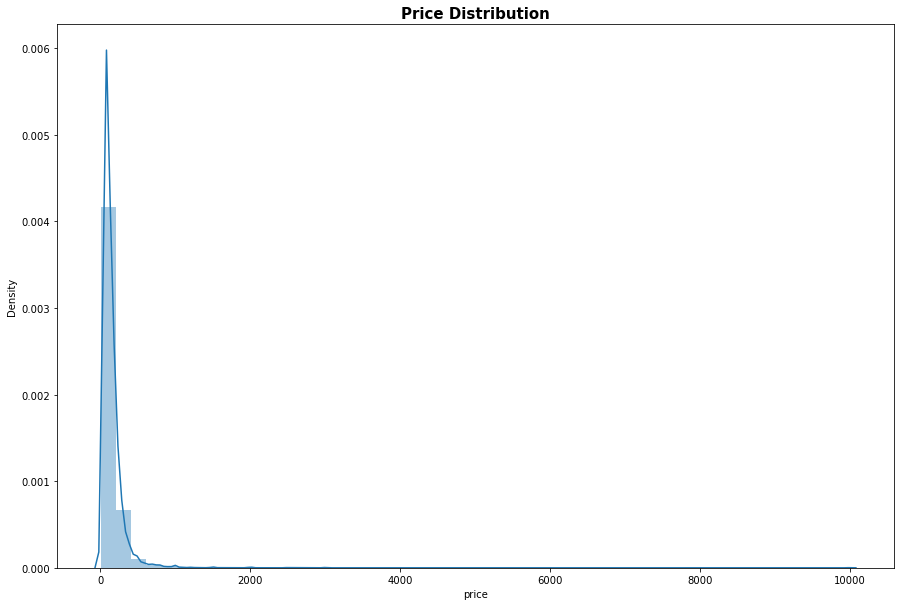

In [7]:
plt.figure(figsize=(15,10))
sns.distplot(df['price'])
plt.title("Price Distribution",size=15, weight='bold')

The distribution of prices is heavily skewed to the right. This distribution can be normalized via log transformation for easier analysis. To avoid dividing by zero, log+1 will be used.

C:\Users\alexa\anaconda3\envs\spyder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Price Distribution')

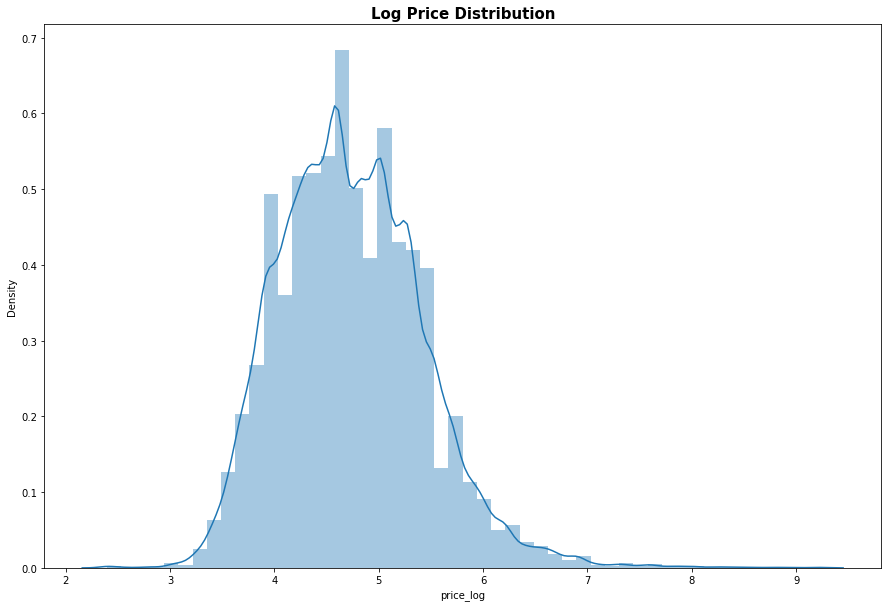

In [8]:
plt.figure(figsize=(15,10))
sns.distplot(df['price_log'])
plt.title("Log Price Distribution",size=15, weight='bold')

## Numerical vs Categorical Data

In [9]:
df_num = df[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'days_since_last_review', 'name_len', 'price', 'price_log']]
df_cat = df[['neighbourhood_group', 'neighbourhood', 'room_type', 'reviewed_yn', 'subway_access', 'mall', 'stadium', 'airport',]]

C:\Users\alexa\anaconda3\envs\spyder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


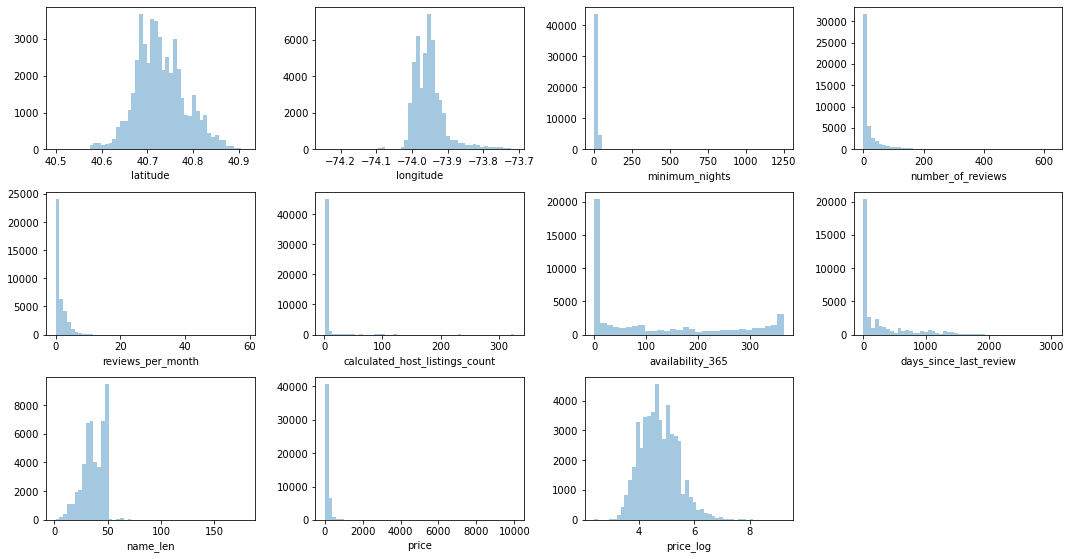

In [10]:
fig = plt.figure(figsize=(15,10))

for i in range(len(df_num.columns)):
    fig.add_subplot(4,4, i+1)
    sns.distplot(df_num.iloc[:,i], kde=False)
    
    
plt.tight_layout()
plt.show()

<AxesSubplot:>

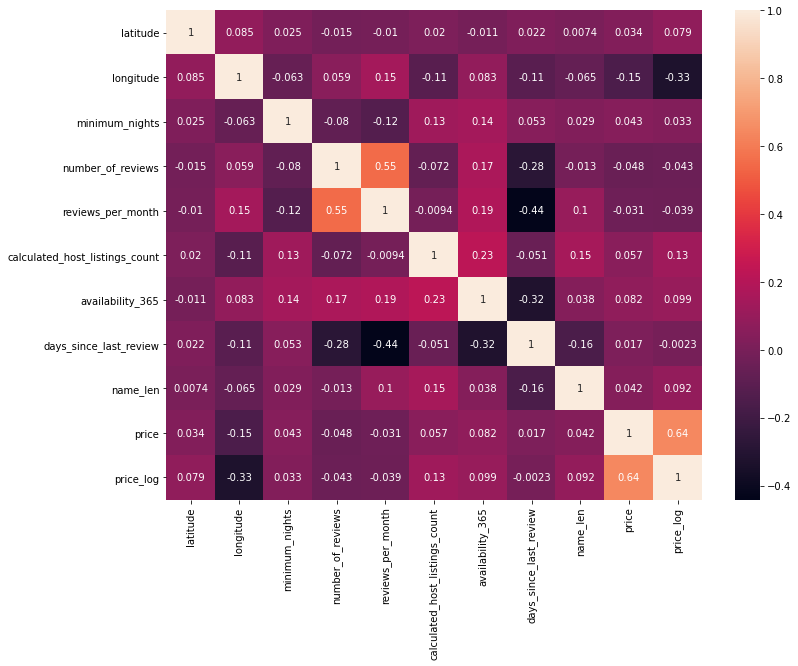

In [11]:
#correlation matrix
corrmat = df_num.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, annot= True)

Since there's not strong correlation bewtween any two features, no feature needs to be excluded due to multicollinearity.

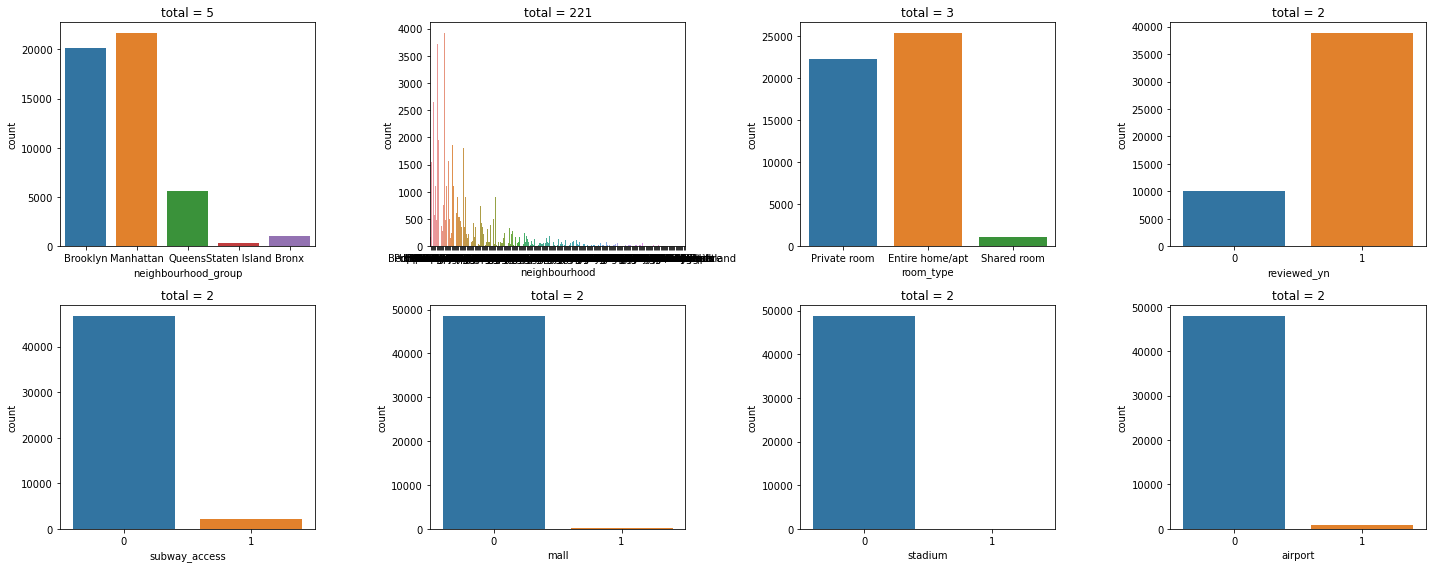

In [12]:
fig = plt.figure(figsize=(20,8))

for i in range(len(df_cat.columns)):
    fig.add_subplot(2,4, i+1)
    cat_num = df_cat.iloc[:,i].value_counts()
    sns.countplot(x=df_cat.iloc[:,i], data=df.dropna()).set_title("total = %d" % (len(cat_num)))
    
plt.tight_layout()
plt.show()

Half of these categorical features are heavily skewed to one value, so these features should be excluded from model building.

In [13]:
df_pivot = df[['neighbourhood_group', 'neighbourhood', 'room_type', 'reviewed_yn', 'subway_access', 'mall', 'stadium', 'airport', 'price']]

Here's an overview of each feature's relation to their average price.

In [14]:
for i in df_pivot.columns[:-1]:
    print(i)
    print(pd.pivot_table(df_pivot, index=i, values='price').sort_values('price', ascending = False))

neighbourhood_group
                          price
neighbourhood_group            
Manhattan            196.884903
Brooklyn             124.438915
Staten Island        114.812332
Queens                99.517649
Bronx                 87.577064
neighbourhood
                     price
neighbourhood             
Fort Wadsworth  800.000000
Woodrow         700.000000
Tribeca         490.638418
Sea Gate        487.857143
Riverdale       442.090909
...                    ...
New Dorp         57.000000
Soundview        53.466667
Tremont          51.545455
Hunts Point      50.500000
Bull's Head      47.333333

[221 rows x 1 columns]
room_type
                      price
room_type                  
Entire home/apt  211.810918
Private room      89.809131
Shared room       70.248705
reviewed_yn
                  price
reviewed_yn            
0            192.938215
1            142.354595
subway_access
                    price
subway_access            
0              154.887987
1              10

In [15]:
pd.pivot_table(df_pivot, index = 'neighbourhood_group', columns = 'room_type', values = 'price', aggfunc = 'count')

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,651,60
Brooklyn,9558,10126,411
Manhattan,13198,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


In [16]:
pd.pivot_table(df_pivot, index = 'neighbourhood_group', columns = 'room_type', values = 'price')

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.890937,59.800000
Brooklyn,178.346202,76.545428,50.773723
Manhattan,249.257994,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


Now a closer look at each neighbourhood and their prominence in count, average price, etc.

In [17]:
pd.set_option('display.max_rows', None)
pd.pivot_table(df_pivot, index = ['neighbourhood_group', 'neighbourhood'], values = 'price', aggfunc = {'price' : ['count', np.mean, np.median, np.std]}).sort_values(by = ['neighbourhood_group', 'mean'], ascending = False)

count        mean  median  \
neighbourhood_group neighbourhood                                            
Staten Island       Fort Wadsworth                 1.0  800.000000   800.0   
                    Woodrow                        1.0  700.000000   700.0   
                    Prince's Bay                   4.0  409.500000   151.5   
                    Randall Manor                 19.0  336.000000    79.0   
                    Willowbrook                    1.0  249.000000   249.0   
                    Todt Hill                      4.0  169.000000    98.5   
                    Grymes Hill                    7.0  159.142857   125.0   
                    Lighthouse Hill                2.0  157.500000   157.5   
                    Shore Acres                    7.0  152.714286   100.0   
                    Tottenville                    7.0  144.857143   100.0   
                    Eltingville                    3.0  141.666667    70.0   
                    Castleton Corners              4.0  139.750000   107.5   
                    Huguenot                       3.0  118.333333   100.0   
                    St. George                    48.0  118.145833    96.0   
                    Arrochar                      21.0  115.000000    65.0   
                    Rosebank                       7.0  111.857143   100.0   
                    Bay Terrace, Staten Island     2.0  102.500000   102.5   
                    New Brighton                   5.0  101.800000    55.0   
                    Great Kills                   10.0  100.600000    83.0   
                    Howland Hook                   2.0  100.000000   100.0   
                    Stapleton                     27.0   98.962963    75.0   
                    Mariners Harbor                8.0   94.625000    71.5   
                    Midland Beach                  6.0   91.833333    95.0   
                    Port Richmond                  9.0   90.111111    50.0   
                    South Beach                    8.0   89.250000    67.5   
                    Clifton                       15.0   84.933333    75.0   
                    Oakwood                        5.0   81.200000    65.0   
                    West Brighton                 18.0   80.555556    69.5   
                    Dongan Hills                   7.0   79.428571    70.0   
                    Richmondtown                   1.0   78.000000    78.0   
                    Tompkinsville                 42.0   76.190476    62.5   
                    New Springville                8.0   76.000000    63.0   
                    Rossville                      1.0   75.000000    75.0   
                    Westerleigh                    2.0   71.500000    71.5   
                    Silver Lake                    2.0   70.000000    70.0   
                    Graniteville                   3.0   68.666667    71.0   
                    Emerson Hill                   5.0   68.200000    78.0   
                    Arden Heights                  4.0   67.250000    72.5   
                    Concord                       26.0   58.192308    34.5   
                    Grant City                     6.0   57.666667    66.0   
                    New Dorp Beach                 5.0   57.400000    40.0   
                    New Dorp                       1.0   57.000000    57.0   
                    Bull's Head                    6.0   47.333333    45.0   
Queens              Neponsit                       3.0  274.666667   274.0   
                    Breezy Point                   3.0  213.333333   195.0   
                    Jamaica Estates               19.0  182.947368   135.0   
                    Arverne                       77.0  171.779221   125.0   
                    Belle Harbor                   8.0  171.500000   155.0   
                    Far Rockaway                  29.0  165.862069    63.0   
                    Bayside                       39.0  157.948718    6

 Here, we can use the coordinates of each listing to map out the city.

C:\Users\alexa\anaconda3\envs\spyder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


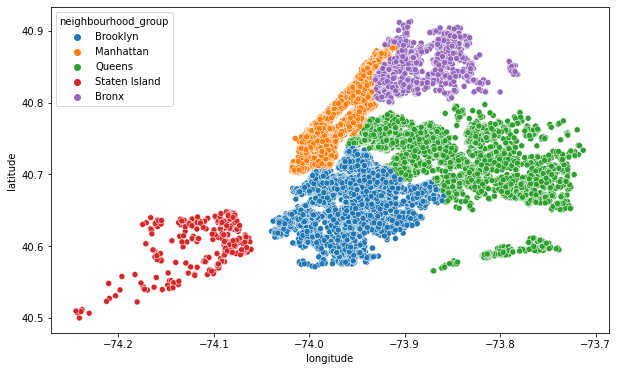

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

C:\Users\alexa\anaconda3\envs\spyder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


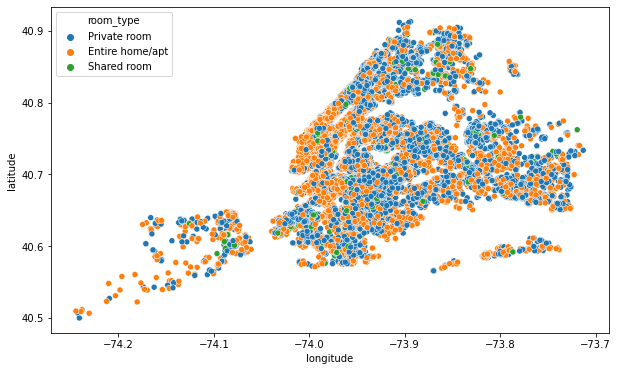

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.room_type)
plt.ioff()

There seems to be no correlation between location and room type.

C:\Users\alexa\anaconda3\envs\spyder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


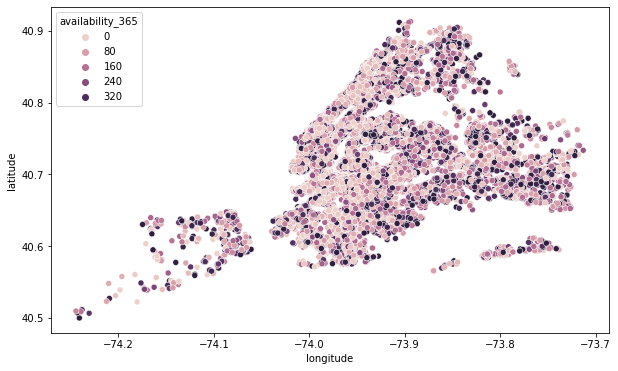

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.availability_365)
plt.ioff()

Location and availability have no significant correlation either.

Below we can see instances of listings that have stadiumns, subway access, or an airport mentioned in their name. Just for fun, see if you can figure out what these locations are referring to!

C:\Users\alexa\anaconda3\envs\spyder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


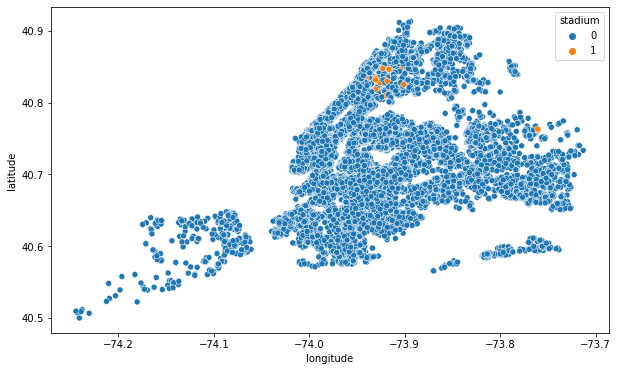

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.stadium)
plt.ioff()

C:\Users\alexa\anaconda3\envs\spyder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


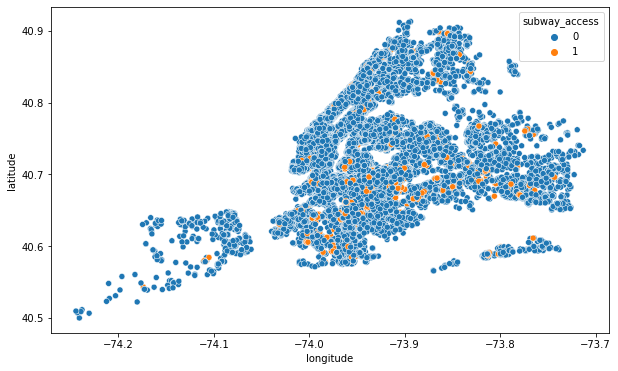

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.subway_access)
plt.ioff()

C:\Users\alexa\anaconda3\envs\spyder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


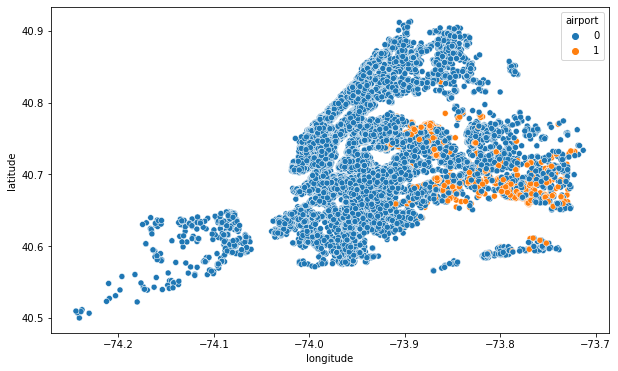

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.airport)
plt.ioff()

In [24]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

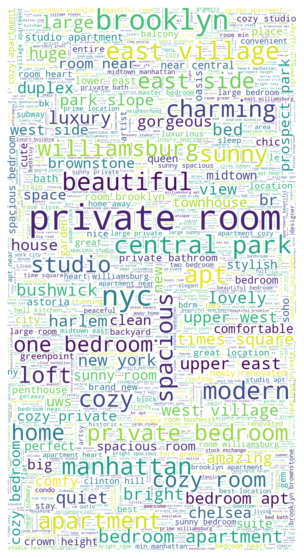

In [25]:
df = df.dropna(subset=['name'])
words = " ".join(df['name'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

Here's a word cloud of words mentioned in the names of each listing. This should give an idea as to how most hosts have branded their listings.